# 4.10 - Coding Etiquette & Excel Reporting

### Table of Contents

* [Tasks for Exercise 4.10](#task_4_10)
* [Step 1](#step2)
    * [Importing Libraries and Data](#import_libraries)
    * [Histograms](#histo)
    * [Scatterplots](#scatter)
    * [Retrying Histrogram after marking outliers as NaN](#histo2)
    * [Line Charts and Sampling Data](#line)
* [Step 2](#step2)
* [Step 3](#step3)
* [Step 4](#step4)
* [Step 5](#step5)
* [Step 6](#step6)
* [Step 7](#step7)
* [Step 8](#step8)
* [Step 9](#step9)

# Tasks for Exercise 4.10 <a class="anchor" id="task_4_10"></a>

# 1. Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column. <a class="anchor" id="step1"></a>

# Importing Libraries and Data <a class="anchor" id="import_libraries"></a>

In [1]:
#Importing libraries and data into dataframe
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Creates a shortcut for importing/exporting dataframes
path = r'/Users/kerimzengin/Desktop/Data Analytics/Data Analytics Immersion/Achievement 4 - Python Fundamentals for Data Analysts/Instacart Basket Analysis/Data'

In [3]:
#Creates dataframe for the pickle file
df = pd.read_pickle(os.path.join(path, 'Prepared Data', 'orders_products_customers.pkl'))

In [4]:
#Shows the number of rows and columns within df dataframe
df.shape

(30358034, 35)

In [5]:
#Shows the all columns and display the first 5 rows within the df dataframe
pd.set_option('display.max_columns', None)
df.head()

,order_id,user_id,eval_set,order_number,order_days_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,slowest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price_orders,spending_habit,median_days_prior_order,order_frequency,first_name,surname,gender,state,age,date_joined,number_of_dependants,family_status,income,_merge
0,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77.0,7.0,9.0,Mid-Range Product,Regularly busy,Least busy,Least busy,Average Orders,10,New customer,6.372222,Low spender,20.5,Non-frequent spender,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both
1,2398795,1,prior,2,3,7,15.0,10258,2,0,Pistachios,117.0,19.0,3.0,Low-Range Product,Regularly busy,Least busy,Least busy,Average Orders,10,New customer,6.372222,Low spender,20.5,Non-frequent spender,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both
2,2398795,1,prior,2,3,7,15.0,12427,3,1,Original Beef Jerky,23.0,19.0,4.4,Low-Range Product,Regularly busy,Least busy,Least busy,Average Orders,10,New customer,6.372222,Low spender,20.5,Non-frequent spender,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both
3,2398795,1,prior,2,3,7,15.0,13176,4,0,Bag of Organic Bananas,24.0,4.0,10.3,Mid-Range Product,Regularly busy,Least busy,Least busy,Average Orders,10,New customer,6.372222,Low spender,20.5,Non-frequent spender,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both
4,2398795,1,prior,2,3,7,15.0,26088,5,1,Aged White Cheddar Popcorn,23.0,19.0,4.7,Low-Range Product,Regularly busy,Least busy,Least busy,Average Orders,10,New customer,6.372222,Low spender,20.5,Non-frequent spender,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both


In [6]:
#Shows all column names within df dataframe
df.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_days_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'slowest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'avg_price_orders', 'spending_habit',
       'median_days_prior_order', 'order_frequency', 'first_name', 'surname',
       'gender', 'state', 'age', 'date_joined', 'number_of_dependants',
       'family_status', 'income', '_merge'],
      dtype='object')

# 2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis. <a class="anchor" id="step2"></a>

In [7]:
#Dropping eval_set, _merge, first_name and surname columns from the existing dataframe and creating a new dataframe for it
df_2 = df.drop(['eval_set', '_merge', 'first_name', 'surname'], axis = 1)

#### I have dropped the eval_set and _merge columsn as they are unnecessary, and the first_name and surname columns as they are sensitive data

# 3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
## Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
## Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.) <a class="anchor" id="step3"></a>

In [8]:
df_2['state'].value_counts(dropna = False)

NaN                     1663455
California               592660
Pennsylvania             591548
Rhode Island             583270
Georgia                  582826
Arizona                  581615
North Carolina           579810
Oklahoma                 577292
Minnesota                575566
New Mexico               573435
Alaska                   572087
Maine                    572044
Wyoming                  571718
Massachusetts            571618
Arkansas                 569740
Mississippi              568509
Texas                    567587
North Dakota             566958
Nevada                   566898
Missouri                 566700
Virginia                 565984
Washington               564485
South Carolina           564362
South Dakota             564183
Louisiana                564042
Alabama                  563930
Kansas                   563923
New York                 563231
Montana                  562656
Michigan                 562326
Kentucky                 562306
Colorado

In [9]:
df_2.isnull().sum()

order_id                         0
user_id                          0
order_number                     0
order_days_of_week               0
order_hour_of_day                0
days_since_prior_order           0
product_id                       0
add_to_cart_order                0
reordered                        0
product_name                 28194
aisle_id                     28194
department_id                28194
prices                       28194
price_range_loc              28194
busiest_day                      0
busiest_days                     0
slowest_days                     0
busiest_period_of_day            0
max_order                        0
loyalty_flag                     0
avg_price_orders                 8
spending_habit                   8
median_days_prior_order          0
order_frequency                  0
gender                     1663455
state                      1663455
age                        1663455
date_joined                1663455
number_of_dependants

In [10]:
#Creating an object for all missing values for the state column
df_nan = df_2[df_2['state'].isnull() == True]

In [11]:
#Checking the values within the df_nan object to match with the number of missing values in the finding missing value function
df_nan

,order_id,user_id,order_number,order_days_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,slowest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price_orders,spending_habit,median_days_prior_order,order_frequency,gender,state,age,date_joined,number_of_dependants,family_status,income
7186,1839867,61,2,5,10,30.0,23106,1,0,Pomegranate on the Bottom Non-Fat Greek Yogurt,120.0,16.0,8.2,Mid-Range Product,Regularly busy,Regularly busy,Regularly busy,Most Orders,4,New customer,6.928070,Low spender,30.0,Non-frequent spender,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7187,1839867,61,2,5,10,30.0,42598,2,0,Non-Fat Blackberry on the Bottom Greek Yogurt,120.0,16.0,11.8,Mid-Range Product,Regularly busy,Regularly busy,Regularly busy,Most Orders,4,New customer,6.928070,Low spender,30.0,Non-frequent spender,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7188,1839867,61,2,5,10,30.0,1094,3,0,Kids Strawberry Yogurt Tubes,120.0,16.0,6.9,Mid-Range Product,Regularly busy,Regularly busy,Regularly busy,Most Orders,4,New customer,6.928070,Low spender,30.0,Non-frequent spender,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7189,1839867,61,2,5,10,30.0,2189,4,0,Banana Low-Fat Greek Yogurt,120.0,16.0,5.3,Mid-Range Product,Regularly busy,Regularly busy,Regularly busy,Most Orders,4,New customer,6.928070,Low spender,30.0,Non-frequent spender,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7190,1839867,61,2,5,10,30.0,7533,5,0,Low-Fat Strawberry Banana on the Bottom Greek ...,120.0,16.0,1.3,Low-Range Product,Regularly busy,Regularly busy,Regularly busy,Most Orders,4,New customer,6.928070,Low spender,30.0,Non-frequent spender,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30356753,1380497,206204,4,4,15,25.0,44683,13,0,Brussels Sprouts,83.0,4.0,11.3,Mid-Range Product,Least busy,Regularly busy,Regularly busy,Average Orders,4,New customer,9.187234,Low spender,11.0,Regular spender,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30356754,1380497,206204,4,4,15,25.0,30720,14,0,Sugar Snap Peas,83.0,4.0,12.0,Mid-Range Product,Least busy,Regularly busy,Regularly busy,Average Orders,4,New customer,9.187234,Low spender,11.0,Regular spender,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30356755,1380497,206204,4,4,15,25.0,49075,15,1,Organic Brown Rice,38.0,1.0,11.5,Mid-Range Product,Least busy,Regularly busy,Regularly busy,Average Orders,4,New customer,9.187234,Low spender,11.0,Regular spender,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30356756,1380497,206204,4,4,15,25.0,32689,16,0,Romaine Hearts,123.0,4.0,2.9,Low-Range Product,Least busy,Regularly busy,Regularly busy,Average Orders,4,New customer,9.187234,Low spender,11.0,Regular spender,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#Create a new cleaned dataframe filtering out the missing values
df_clean = df_2[df_2['state'].isnull() == False]

In [13]:
#Check for the number of rows and columns after filtering missing values
df_clean.shape

(28694579, 31)

#### Number of rows from previous .shape() function = 30358034
#### Number of rows from current .shape() function = 28694579
#### Number of missing value rows removed = 1663455
##### The procedure is successful

In [14]:
#Showing all counts for each state after removing missing values
df_clean['state'].value_counts(dropna = False)

California              592660
Pennsylvania            591548
Rhode Island            583270
Georgia                 582826
Arizona                 581615
North Carolina          579810
Oklahoma                577292
Minnesota               575566
New Mexico              573435
Alaska                  572087
Maine                   572044
Wyoming                 571718
Massachusetts           571618
Arkansas                569740
Mississippi             568509
Texas                   567587
North Dakota            566958
Nevada                  566898
Missouri                566700
Virginia                565984
Washington              564485
South Carolina          564362
South Dakota            564183
Louisiana               564042
Alabama                 563930
Kansas                  563923
New York                563231
Montana                 562656
Michigan                562326
Kentucky                562306
Colorado                562276
Delaware                561011
Oregon  

In [15]:
#Create a list for all states into their respectible regions

result = []
for value in df_clean['state']:
    if (value == 'Maine' or value == 'New Hampshire' or value == 'Vermount' or value == 'Massachusetts' or value == 'Rhode Island' or value == 'Connecticut' or value == 'New York' or value == 'Pennsylvania' or value == 'New Jersey'):
        result.append('Northeast')
    elif (value == 'Wisconsin' or value == 'Michigan' or value == 'Illinois' or value == 'Indiana' or value == 'Ohio' or value == 'North Dakota' or value == 'South Dakota' or value == 'Nebraska' or value == 'Kansas' or value == 'Minnesota' or value == 'Iowa' or value == 'Missouri'):
        result.append('Midwest')
    elif (value == 'Delaware' or value == 'Maryland' or value == 'District of Columbia' or value == 'Virginia' or value == 'West Virginia' or value == 'North Carolina' or value == 'South Carolina' or value == 'Georgia' or value == 'Florida' or value == 'Kentucky' or value == 'Tennessee' or value == 'Mississippi' or value == 'Alabama' or value == 'Oklahoma' or value == 'Texas' or value == 'Arkansas' or value == 'Louisiana'):
        result.append('South')
    else: 
        result.append('West')

In [16]:
result

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 

In [17]:
#Create a new Region column in the dataframe to put all values from the result list
df_clean['region'] = result

<ipython-input-17-946ddc00a67a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['region'] = result


In [18]:
#Shows the value counts for reach region within the region column
df_clean['region'].value_counts(dropna = False)

South        9553990
West         7882721
Midwest      6720071
Northeast    4537797
Name: region, dtype: int64

In [19]:
#Create a crosstab object to compare the values between region and spending habit
crosstab = pd.crosstab(df_clean['region'], df_clean['spending_habit'], dropna = False)

In [20]:
#Copying crosstab to computer clipboard
crosstab.to_clipboard()

In [21]:
#Showing the values of higher and lower spenders for each region
crosstab

spending_habit,High spender,Low spender
region,,
Midwest,142578,6577493
Northeast,84524,4453273
South,184479,9369503
West,150950,7731771


#### The crosstab shows that the states in the South region combined has the highest number of high and low spenders.

# 4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample. <a class="anchor" id="step4"></a>

In [22]:
#Create an activity flag for low activity customers with total orders under 5
df_clean.loc[df_clean['max_order'] < 5, 'activity_status'] = 'Low Activity'

/Users/kerimzengin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/kerimzengin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [23]:
#Create an activity flag for high activity customers with total orders 5 or more
df_clean.loc[df_clean['max_order'] >= 5, 'activity_status'] = 'High Activity'

/Users/kerimzengin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [24]:
#Shows the total counts of high and low activity customers within the dataframe
df_clean['activity_status'].value_counts(dropna = False)

High Activity    27726184
Low Activity       968395
Name: activity_status, dtype: int64

In [25]:
#Creates a subset for data on only low activity customers
df_low_activity = df_clean[df_clean['activity_status'] == 'Low Activity']

In [26]:
#Checking the information of the subset
df_low_activity.head()

,order_id,user_id,order_number,order_days_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,slowest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price_orders,spending_habit,median_days_prior_order,order_frequency,gender,state,age,date_joined,number_of_dependants,family_status,income,region,activity_status
328,1909121,5,2,0,16,11.0,43693,1,1,Whole Vitamin D Milk,84.0,16.0,14.5,Mid-Range Product,Busiest day,Busiest day,Busiest day,Average Orders,4,New customer,9.365385,Low spender,11.0,Regular spender,Female,California,75.0,10/8/2018,0.0,divorced/widowed,115242.0,West,Low Activity
329,1909121,5,2,0,16,11.0,6808,2,0,Organic Spinach & Cheese Tortellini,12.0,9.0,13.1,Mid-Range Product,Busiest day,Busiest day,Busiest day,Average Orders,4,New customer,9.365385,Low spender,11.0,Regular spender,Female,California,75.0,10/8/2018,0.0,divorced/widowed,115242.0,West,Low Activity
330,1909121,5,2,0,16,11.0,24535,3,1,Plain Whole Milk Yogurt,120.0,16.0,8.0,Mid-Range Product,Busiest day,Busiest day,Busiest day,Average Orders,4,New customer,9.365385,Low spender,11.0,Regular spender,Female,California,75.0,10/8/2018,0.0,divorced/widowed,115242.0,West,Low Activity
331,1909121,5,2,0,16,11.0,11777,4,1,Red Raspberries,123.0,4.0,10.5,Mid-Range Product,Busiest day,Busiest day,Busiest day,Average Orders,4,New customer,9.365385,Low spender,11.0,Regular spender,Female,California,75.0,10/8/2018,0.0,divorced/widowed,115242.0,West,Low Activity
332,1909121,5,2,0,16,11.0,21616,5,0,Organic Baby Arugula,123.0,4.0,4.9,Low-Range Product,Busiest day,Busiest day,Busiest day,Average Orders,4,New customer,9.365385,Low spender,11.0,Regular spender,Female,California,75.0,10/8/2018,0.0,divorced/widowed,115242.0,West,Low Activity


In [27]:
#Exporting the subset as a pickle file to the Prepared Data folder
df_low_activity.to_pickle(os.path.join(path, 'Prepared Data', 'low_activity_customers.pkl'))

In [28]:
#Create a new dataframe with information of only high activity customers
df_3 = df_clean[df_clean.activity_status == 'High Activity']

In [29]:
#Checking the number of rows and columns for the new dataframe
df_3.shape

(27726184, 33)

In [30]:
#Checking first five information of dataframe
df_3.head()

,order_id,user_id,order_number,order_days_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,slowest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price_orders,spending_habit,median_days_prior_order,order_frequency,gender,state,age,date_joined,number_of_dependants,family_status,income,region,activity_status
0,2398795,1,2,3,7,15.0,196,1,1,Soda,77.0,7.0,9.0,Mid-Range Product,Regularly busy,Least busy,Least busy,Average Orders,10,New customer,6.372222,Low spender,20.5,Non-frequent spender,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,South,High Activity
1,2398795,1,2,3,7,15.0,10258,2,0,Pistachios,117.0,19.0,3.0,Low-Range Product,Regularly busy,Least busy,Least busy,Average Orders,10,New customer,6.372222,Low spender,20.5,Non-frequent spender,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,South,High Activity
2,2398795,1,2,3,7,15.0,12427,3,1,Original Beef Jerky,23.0,19.0,4.4,Low-Range Product,Regularly busy,Least busy,Least busy,Average Orders,10,New customer,6.372222,Low spender,20.5,Non-frequent spender,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,South,High Activity
3,2398795,1,2,3,7,15.0,13176,4,0,Bag of Organic Bananas,24.0,4.0,10.3,Mid-Range Product,Regularly busy,Least busy,Least busy,Average Orders,10,New customer,6.372222,Low spender,20.5,Non-frequent spender,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,South,High Activity
4,2398795,1,2,3,7,15.0,26088,5,1,Aged White Cheddar Popcorn,23.0,19.0,4.7,Low-Range Product,Regularly busy,Least busy,Least busy,Average Orders,10,New customer,6.372222,Low spender,20.5,Non-frequent spender,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,South,High Activity


# 5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”) <a class="anchor" id="step5"></a>

In [32]:
#Showing the number of orders for each age category group within each department ID
crosstab_3 = pd.crosstab(df_3['age'], df_3['department_id'], dropna = False)
crosstab_3

department_id,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0
age,,,,,,,,,,,,,,,,,,,,,
18.0,29339,530,15817,124584,2691,3720,34566,903,11761,479,6179,9521,24756,9586,13839,71530,10051,5861,37855,13708,949
19.0,30704,509,15244,129302,2610,3790,37814,1849,11986,482,6130,10318,25427,9514,14791,74074,10620,5579,38687,14130,976
20.0,30438,628,15577,127518,2149,3609,34052,1726,10887,480,5890,9023,24725,9680,13949,72632,9748,6262,38260,13724,1116
21.0,29358,466,16456,127652,1851,3712,36938,1781,11868,541,5838,9106,25431,9953,14064,74799,9261,4779,39728,14435,924
22.0,29171,426,15997,130915,2459,3722,34963,1250,11597,405,5786,9791,24523,9922,13715,73285,9844,6203,39313,13940,966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77.0,30053,407,16205,123799,2024,3566,34649,1724,11184,373,5637,8718,23991,9150,13468,71593,9991,5583,39293,14457,902
78.0,29322,480,15360,125640,1851,3453,34805,1869,11377,466,5588,9434,24656,8719,13888,71044,9565,4939,37473,13320,885
79.0,30761,480,15992,134172,2353,3824,38302,1203,12033,483,6070,10428,25627,9737,15057,74095,10557,6159,40198,14646,947


In [61]:
#Create a profile showing the sum of all order prices for each day of the week
crosstab_4 = pd.crosstab(df_3['prices'].sum(), df_3['order_hour_of_day'], dropna = False)
crosstab_4

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
row_0,,,,,,,,,,,,,,,,,,,,,,,,
328772357.7,185249,97755,57632,42863,44071,75984,254127,779323,1495541,2126462,2378641,2344685,2230619,2272102,2301116,2271397,2157920,1769389,1379772,1063522,829578,684631,541689,342116


In [70]:
#Creates a profile showing the total number of people within each age group that belong to a family status
crosstab_5 = pd.crosstab(df_3['prices'].sum(), df_3['family_status'], dropna = False)
crosstab_5

family_status,divorced/widowed,living with parents and siblings,married,single
row_0,,,,
328772357.7,2379243,1332057,19466894,4547990


In [36]:
#This profile shows the total number of orders from each family status for each department ID
crosstab_7 = pd.crosstab(df_3['family_status'], df_3['department_id'], dropna = False)
crosstab_7

department_id,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0
family_status,,,,,,,,,,,,,,,,,,,,,
divorced/widowed,163856,2513,85950,700082,10557,19571,199040,7203,62951,2429,32181,51817,135706,50856,75333,398124,52043,31117,213156,77806,4713
living with parents and siblings,92263,1641,48330,387714,7632,11119,108175,4873,35356,1448,18041,29097,76814,29656,43389,224686,30038,17322,117313,42771,3013
married,1324933,21241,702581,5716351,88102,159318,1616806,57187,515076,21535,264461,426358,1116030,419671,634927,3256068,439815,259503,1740106,626997,42214
single,306872,5132,166033,1337175,22413,37825,379715,13619,118872,4775,61802,96292,259222,98116,148716,759948,99578,61969,407422,147975,10042


In [95]:
#Creating a flag for income status for high, medium and low income
df_3.loc[df_3['income'] > 100000, 'income_status'] = 'High Income'

/Users/kerimzengin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [96]:
df_3.loc[(df_3['income'] <= 100000) & (df_3['income'] > 40000), 'income_status'] = 'Medium Income'

/Users/kerimzengin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [97]:
df_3.loc[df_3['income'] <= 40000, 'income_status'] = 'Low Income'

/Users/kerimzengin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [98]:
#This profile shows income status values for the number of people from a certain family status 
crosstab_8 = pd.crosstab(df_3['income_status'], df_3['family_status'], dropna = False)
crosstab_8

family_status,divorced/widowed,living with parents and siblings,married,single
income_status,,,,
High Income,1662857,43617,9488628,1536653
Low Income,97298,87322,984035,264222
Medium Income,619088,1201118,8994231,2747115


In [100]:
#This profile shows the number of values from the income status flag for each age group
crosstab_9 = pd.crosstab(df_3['income_status'], df_3['department_id'], dropna = False)
crosstab_9

department_id,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0
income_status,,,,,,,,,,,,,,,,,,,,,
High Income,879693,13984,472877,3800787,61723,106769,1009252,40485,349944,12758,171692,300464,748737,265467,432756,2159342,284745,178311,990944,412818,27348
Low Income,90212,1734,43690,336989,7420,8864,171698,3875,25537,2079,19864,11246,67947,41082,30841,209959,37311,10368,262100,45647,2877
Medium Income,918019,14809,486327,4003546,59561,112200,1122786,38522,356774,15350,184929,291854,771088,291750,438768,2269525,299418,181232,1224953,437084,29757


# 6. Create an appropriate visualization to show the distribution of profiles. <a class="anchor" id="step6"></a>

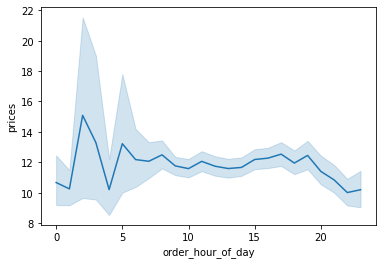

In [62]:
#Showing which hour of the day has the most orders
crosstab_4_line = sns.lineplot(data = df_3, x = 'order_hour_of_day',y = 'prices')

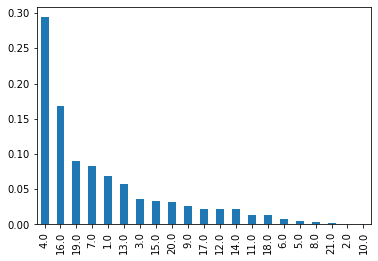

In [67]:
#This bar chart shows which departments are most popular amongst all ages groups
crosstab_3_bar = df_3['department_id'].value_counts('age').plot.bar()

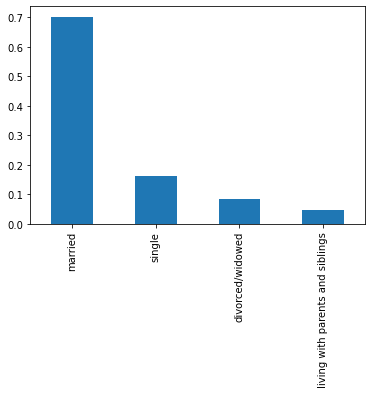

In [72]:
crosstab_5_bar = df_3['family_status'].value_counts('prices').plot.bar()

<AxesSubplot:xlabel='department_id'>

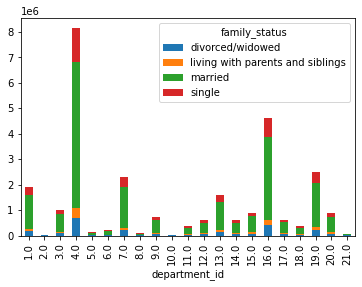

In [87]:
#Showing the level of orders by family status for each department ID
crosstab_7_stack = df_3.groupby(['department_id', 'family_status'])['department_id'].count().unstack('family_status').fillna(0)
crosstab_7_stack.plot(kind='bar', stacked=True)

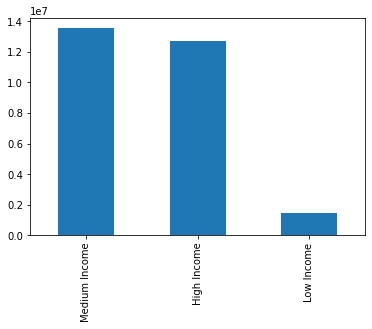

In [99]:
#showing the frequency of customers by their income status
Income_bar = df_3['income_status'].value_counts().plot.bar()

<AxesSubplot:xlabel='department_id'>

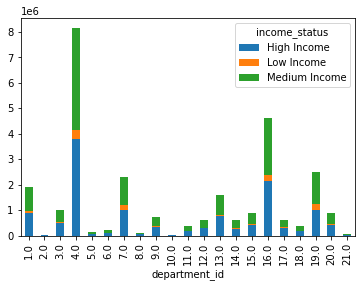

In [106]:
#Showing the level of orders by family status for each department ID
crosstab_9_stack = df_3.groupby(['department_id', 'income_status'])['department_id'].count().unstack('income_status').fillna(0)
crosstab_9_stack.plot(kind='bar', stacked=True)

# 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure. <a class="anchor" id="step7"></a>

In [107]:
#Showing the mean, max and min variables for all users based on expenditure
df_3.groupby('user_id').agg({'prices': ['mean', 'max', 'min']})

prices           
             mean   max  min
user_id                     
1        6.372222  14.0  1.0
2        7.583516  14.8  1.3
3        8.302564  14.3  1.3
4        7.607143  14.6  1.4
7        7.521649  23.2  1.1
...           ...   ...  ...
206203   6.527835  15.0  1.0
206206   7.601068  14.8  1.1
206207   7.186432  24.7  1.2
206208   8.380150  21.6  1.1
206209   7.051724  18.8  1.1

[153807 rows x 3 columns]

In [108]:
#Showing the mean, max and min variables for all users based on usage frequency
df_3.groupby('user_id').agg({'days_since_prior_order': ['mean', 'max', 'min']})

days_since_prior_order            
                          mean   max   min
user_id                                   
1                    20.259259  30.0   0.0
2                    15.967033  30.0   3.0
3                    11.487179  21.0   7.0
4                    15.357143  21.0   0.0
7                    13.546392  30.0   2.0
...                        ...   ...   ...
206203               29.103093  30.0  27.0
206206                4.042705  15.0   0.0
206207               14.879397  30.0   1.0
206208                7.442105  20.0   0.0
206209               20.275862  30.0   3.0

[153807 rows x 3 columns]

# 8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important. <a class="anchor" id="step8"></a>

<AxesSubplot:xlabel='department_id'>

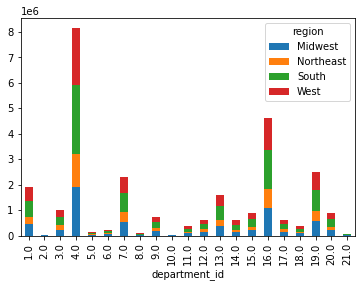

In [109]:
#Showing the level of orders by region for each department ID
depart_region_stack = df_3.groupby(['department_id', 'region'])['department_id'].count().unstack('region').fillna(0)
depart_region_stack.plot(kind='bar', stacked=True)

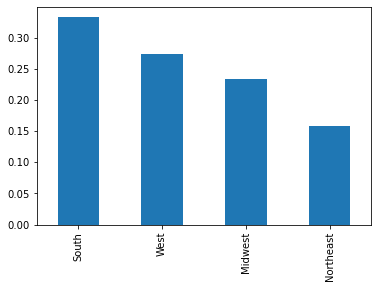

In [110]:
#Showing the total expenditure for each region
price_region_bar = df_3['region'].value_counts('prices').plot.bar()

<AxesSubplot:xlabel='region'>

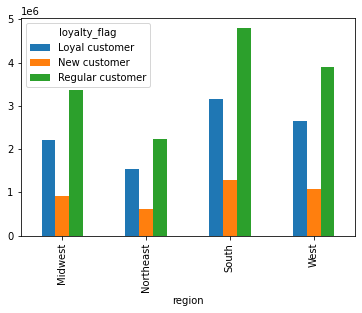

In [128]:
#Showing the share of loyalty customers within each region
loyalty_region_bar = df_3.groupby(['loyalty_flag', 'region'])['region'].count().unstack('loyalty_flag').fillna(0)
loyalty_region_bar.plot(kind='bar', stacked=False)

# 9. Exporting all visualisations and dataframe into the project folder <a class="anchor" id="step9"></a>

In [116]:
path2 = r'/Users/kerimzengin/Desktop/Data Analytics/Data Analytics Immersion/Achievement 4 - Python Fundamentals for Data Analysts/Instacart Basket Analysis'

In [118]:
crosstab_4_line.figure.savefig(os.path.join(path2, 'Analysis', 'Visualisations', 'order_hour_of_day_vs_price_linechart.png'))

In [119]:
crosstab_3_bar.figure.savefig(os.path.join(path2, 'Analysis', 'Visualisations', 'department_vs_age_bar.png'))

In [120]:
crosstab_5_bar.figure.savefig(os.path.join(path2, 'Analysis', 'Visualisations', 'family_status_vs_prices_bar.png'))

In [126]:
Income_bar.figure.savefig(os.path.join(path2, 'Analysis', 'Visualisations', 'income_bar.png'))

In [127]:
price_region_bar.figure.savefig(os.path.join(path2, 'Analysis', 'Visualisations', 'price_vs_region_bar.png'))

In [130]:
df_3.to_pickle(os.path.join(path, 'Prepared Data', 'high_activity_customers.pkl'))